# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
# we are reading the data directly from raw github link
# we are also defining the name of the columns.
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [9]:
# just to get rough idea about the data
print(df.shape)
print(df.columns)
df["survival_status"].value_counts()
df["operation_Year"].value_counts()

(306, 4)
Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


58    36
64    31
63    30
60    28
65    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: operation_Year, dtype: int64

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

Here we want to analys the data regading the cancer patient related to breast cancer.

We had the data of people having breast cancer along with cancer cell detected in axiliary nodes, year of operation, age and how long they had lived after the operation.

Our objective is to find any correlation between the data and establish a conclusion.

### Here we have the format of data.
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)
- 1 = the patient survived 5 years or longer
- 2 = the patient died within 5 year

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


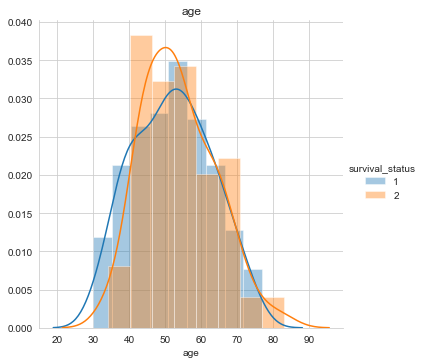

In [15]:
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "age").add_legend();
plt.title('age')
plt.show();

- Here we can see that younger age female live bit longer than the elder age by analyzing the data in above graph.

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


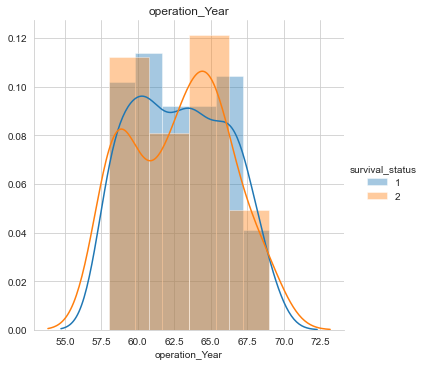

In [14]:
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "operation_Year").add_legend();
plt.title('operation_Year')
plt.show();

- There is no clear conclusion of above graph.

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


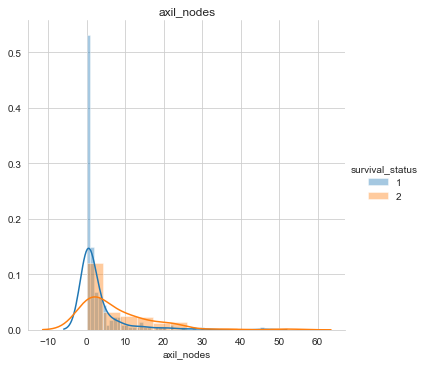

In [13]:
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "axil_nodes").add_legend();
plt.title('axil_nodes')
plt.show();

- Blue peak at 0 and orange graph flatten show that the survival of the patient is more if no cancer cell is found in the auxiliary nodes.


[0.73529412 0.         0.         0.         0.         0.
 0.         0.         0.         0.26470588]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


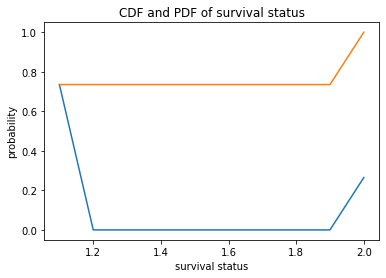

In [2]:
counts, bin_edges = np.histogram(df['survival_status'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("CDF and PDF of survival status")
plt.xlabel("survival status")
plt.ylabel("probability")
plt.show()

- The above graph shows that 73.5% of patients had survived more than 5 years after the operation from 1958 to 1969, total number of patients is 309.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


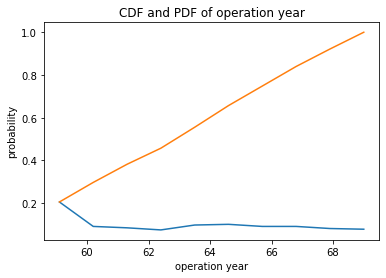

In [3]:
counts, bin_edges = np.histogram(df['operation_Year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("CDF and PDF of operation year")
plt.xlabel("operation year")
plt.ylabel("probability")
plt.show()

The number of treatment from 1958-1969 almost remain uniform. 

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


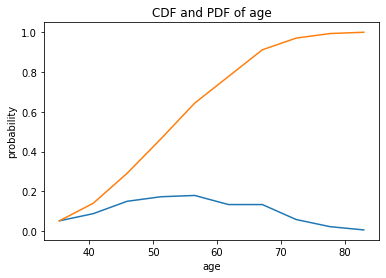

In [4]:
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("CDF and PDF of age")
plt.xlabel("age")
plt.ylabel("probability")
plt.show()

The number of patient of age between 40 to 70 is high.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


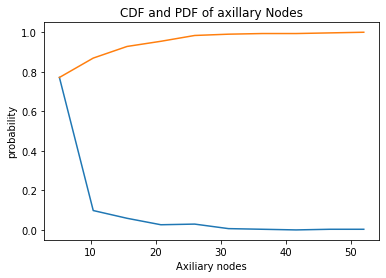

In [5]:
counts, bin_edges = np.histogram(df['axil_nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("CDF and PDF of axillary Nodes")
plt.xlabel("Axiliary nodes")
plt.ylabel("probability")
plt.show()

- Majority of patient diagnosed with cancer cells in their axillary nodes is low and more than 10 nodes diagnosed is even very few. 

- about 77.1% of patient there is no cancer cells found in there axillary nodes.


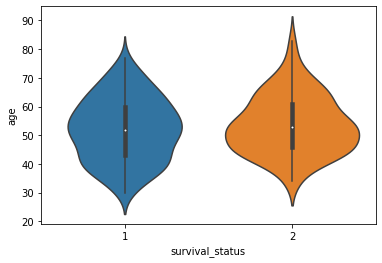

In [5]:
sns.violinplot(x='survival_status',y='age',data=df,size=10)
plt.show()

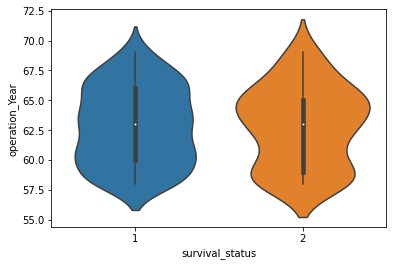

In [6]:
sns.violinplot(y='operation_Year',x='survival_status',data=df,size=10)
plt.show()

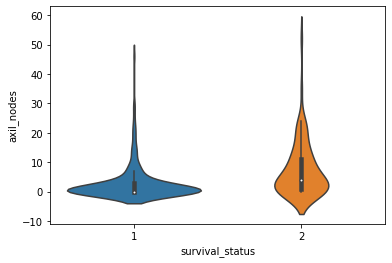

In [8]:
sns.violinplot(y='axil_nodes',x='survival_status',data=df,size=10)
plt.show()

The above violin plot shows us that there is more number of patients who lives longer when zero number of axillary nodes detected with cancer infections.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


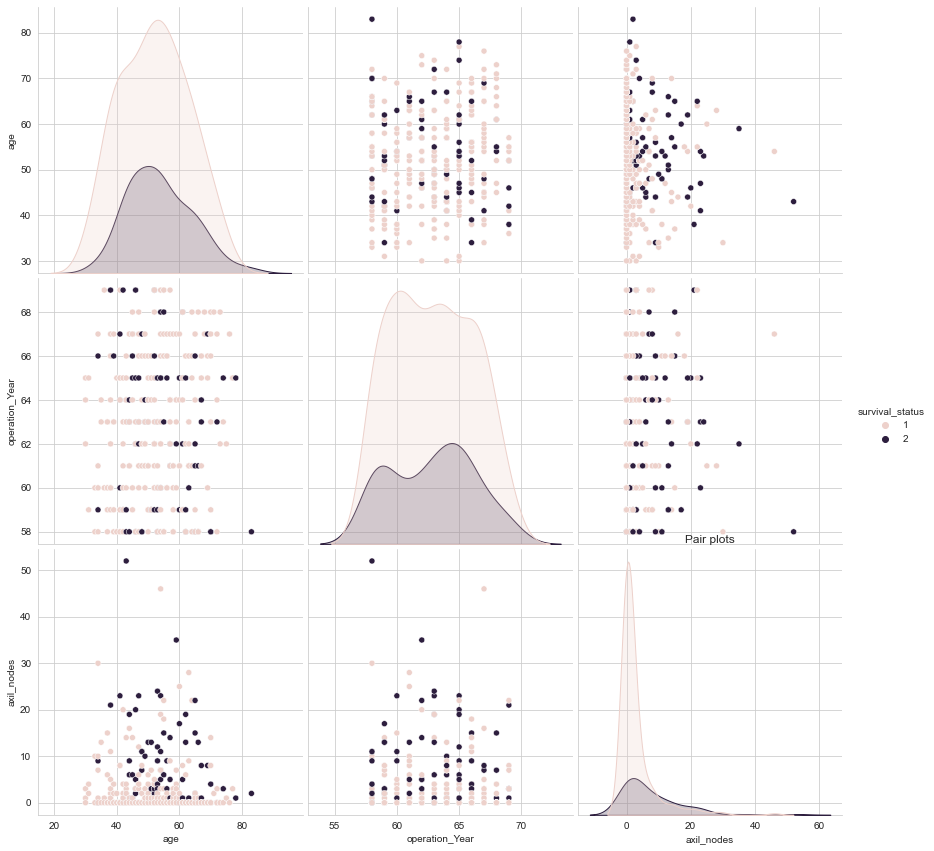

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df,hue="survival_status", height=4);
plt.title('Pair plots')
plt.show()

- Number of 1's is more then 2's in survival status that means most of the patients survived more then 5 years after the operation .


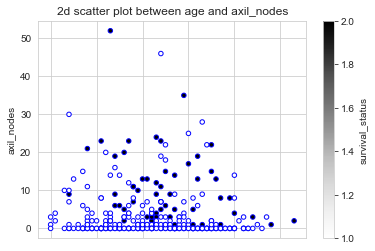

In [4]:
df.plot(kind='scatter', y='axil_nodes', x='age',c='survival_status',edgecolor='blue', linewidth=1,alpha=5) ;
#df.plot(kind='scatter',x='age',y='survival_status');
plt.title('2d scatter plot between age and axil_nodes')
plt.show()

X-axis age, y-axis axil_nodes, black dots means death in 5 years of time and white dots means in death beyond 5 years of time.
- Here we can see that there is an probablity of dying in 5 years of time if the cancer cells are founded in axil_nodes aka auxiliary nodes.
- Looking at above graph we cannot conclude any other result.


### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

### summary

- We are camparing all the data with suvival statutes of the patients to find out any Correlation between data and lifespan of patients.


- Majority of patient are between the age group of 40 to 70.

- Less number of patients had cancer cell in there axillary nodes.

- It has been observed that a very less number of patients had lived shorter life when cancer cells is found in their axillary nodes. The reason behind this is that the probability of getting reinfection is low if the cancer is not spread to axillary nodes and thus incerasing the lifespan.

- We need more data to conclude any more result.